# Exploratory Data Analysis: Employee Churn

## 1. Introduction

> In this notebook, we perform an initial exploratory data analysis (EDA) on the Employee Churn dataset. This step is crucial for understanding the structure, content, and quality of the data, and to formulate early hypotheses.

Objectives:
- Understand the structure of the data
- Detect missing values and data types
- Identify next steps to perform in data cleaning
- Generate descriptive statistics
- Explore distributions and potential relationships

## 2. Load Libraries

In [17]:
# Standard libraries
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd
from pathlib import Path
import seaborn as sns
import sys

# Add the project root to sys.path
project_root = Path.cwd().parent  # from notebooks/ to root
sys.path.append(str(project_root))

# Custom modules
from src.config import RAW_EMPLOYEE_CHURN_FILE
from src.data.load_data import load_data
from src.features.build_features import feature_engineering_economic_costs
from src.eda.eda import visualize_categorical, statistics_numerical, analysis_by_target, correlation_matrix

%matplotlib inline

## 3. Load Data

In [18]:
df = load_data(RAW_EMPLOYEE_CHURN_FILE)
df

,age,turnover,travels,department,distance_from_home,education,career,employees,environment_satisfaction,gender,...,coworker_satisfaction,biweekly_hours,stock_option_level,years_of_experience,trainings_last_year,work_life_balance,years_at_company,years_in_position,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Bachelor,Life Sciences,1,Medium,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,High School,Life Sciences,1,High,2.0,...,Very High,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High School,Other,1,Very High,2.0,...,Medium,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Bachelor,Life Sciences,1,Very High,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Bachelor,Medical,1,Low,3.0,...,Very High,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High School,Medical,1,Very High,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Medium,4.0,...,Medium,80,1,6,0,NaN,6,NaN,0,3


## 4. Explore dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   turnover                    1470 non-null   object 
 2   travels                     1470 non-null   object 
 3   department                  1470 non-null   object 
 4   distance_from_home          1470 non-null   int64  
 5   education                   1369 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   environment_satisfaction    1470 non-null   object 
 9   gender                      1271 non-null   float64
 10  engagement                  1452 non-null   object 
 11  job_level                   1470 non-null   int64  
 12  position                    1470 non-null   object 
 13  job_satisfaction            1394 non-n

The dataset has 30 descriptive columns plus 1 target column (the value to predict - turnover).  
We make sure that the data types matches the values.

## 5. Data types and missing values

In [20]:
df.dtypes

age                             int64
turnover                       object
travels                        object
department                     object
distance_from_home              int64
education                      object
career                         object
employees                       int64
environment_satisfaction       object
gender                        float64
engagement                     object
job_level                       int64
position                       object
job_satisfaction               object
marital_status                 object
monthly_salary                  int64
previous_companies_count        int64
over_18                        object
overtime_hours                 object
salary_increase_pct             int64
performance_rating             object
coworker_satisfaction          object
biweekly_hours                  int64
stock_option_level              int64
years_of_experience             int64
trainings_last_year             int64
work_life_ba

In [21]:
# Gender is categorical
df['gender'] = df['gender'].astype('object')

In [22]:
# Missing values
df.isna().sum().sort_values(ascending = False)

years_in_position             1238
work_life_balance             1011
gender                         199
education                      101
job_satisfaction                76
engagement                      18
travels                          0
career                           0
distance_from_home               0
department                       0
environment_satisfaction         0
employees                        0
job_level                        0
turnover                         0
age                              0
marital_status                   0
position                         0
monthly_salary                   0
previous_companies_count         0
salary_increase_pct              0
performance_rating               0
over_18                          0
overtime_hours                   0
biweekly_hours                   0
coworker_satisfaction            0
years_of_experience              0
stock_option_level               0
trainings_last_year              0
years_at_company    

Analysis:
- `years_in_position` and `work_life_balance` has too much missing values (over 80% of the dataset) -> remove columns
- `gender`, `education`, `job_satisfaction` and `engagement` -> fill missing values after EDA analysis

In [23]:
df.drop(columns=['years_in_position', 'work_life_balance'], inplace=True)

## 6. Descriptive statistics

In [24]:
print(df.shape)
print(df['turnover'].value_counts(normalize=True) * 100)

(1470, 29)
turnover
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


> Important: The target feature is imbalanced (16%-84%) - keep in mind when choosing the model and build the performance metrics.  
> For example, accuracy in this case will not be a good metric.

In [25]:
df.describe(include='all')

,age,turnover,travels,department,distance_from_home,education,career,employees,environment_satisfaction,gender,...,salary_increase_pct,performance_rating,coworker_satisfaction,biweekly_hours,stock_option_level,years_of_experience,trainings_last_year,years_at_company,years_since_last_promotion,years_with_current_manager
count,1470.000000,1470,1470,1470,1470.000000,1369,1470,1470.0,1470,1271.0,...,1470.000000,1470,1470,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,4,6,NaN,4,4.0,...,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,Bachelor,Life Sciences,NaN,High,3.0,...,NaN,High,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,814,606,NaN,453,739.0,...,NaN,1244,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,NaN,NaN,1.0,NaN,NaN,...,15.209524,NaN,NaN,80.0,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,NaN,NaN,0.0,NaN,NaN,...,3.659938,NaN,NaN,0.0,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,...,11.000000,NaN,NaN,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,NaN,NaN,1.0,NaN,NaN,...,12.000000,NaN,NaN,80.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,NaN,NaN,1.0,NaN,NaN,...,14.000000,NaN,NaN,80.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,NaN,NaN,1.0,NaN,NaN,...,18.000000,NaN,NaN,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000


## 7. Analysis

### 7.1 Categorical features

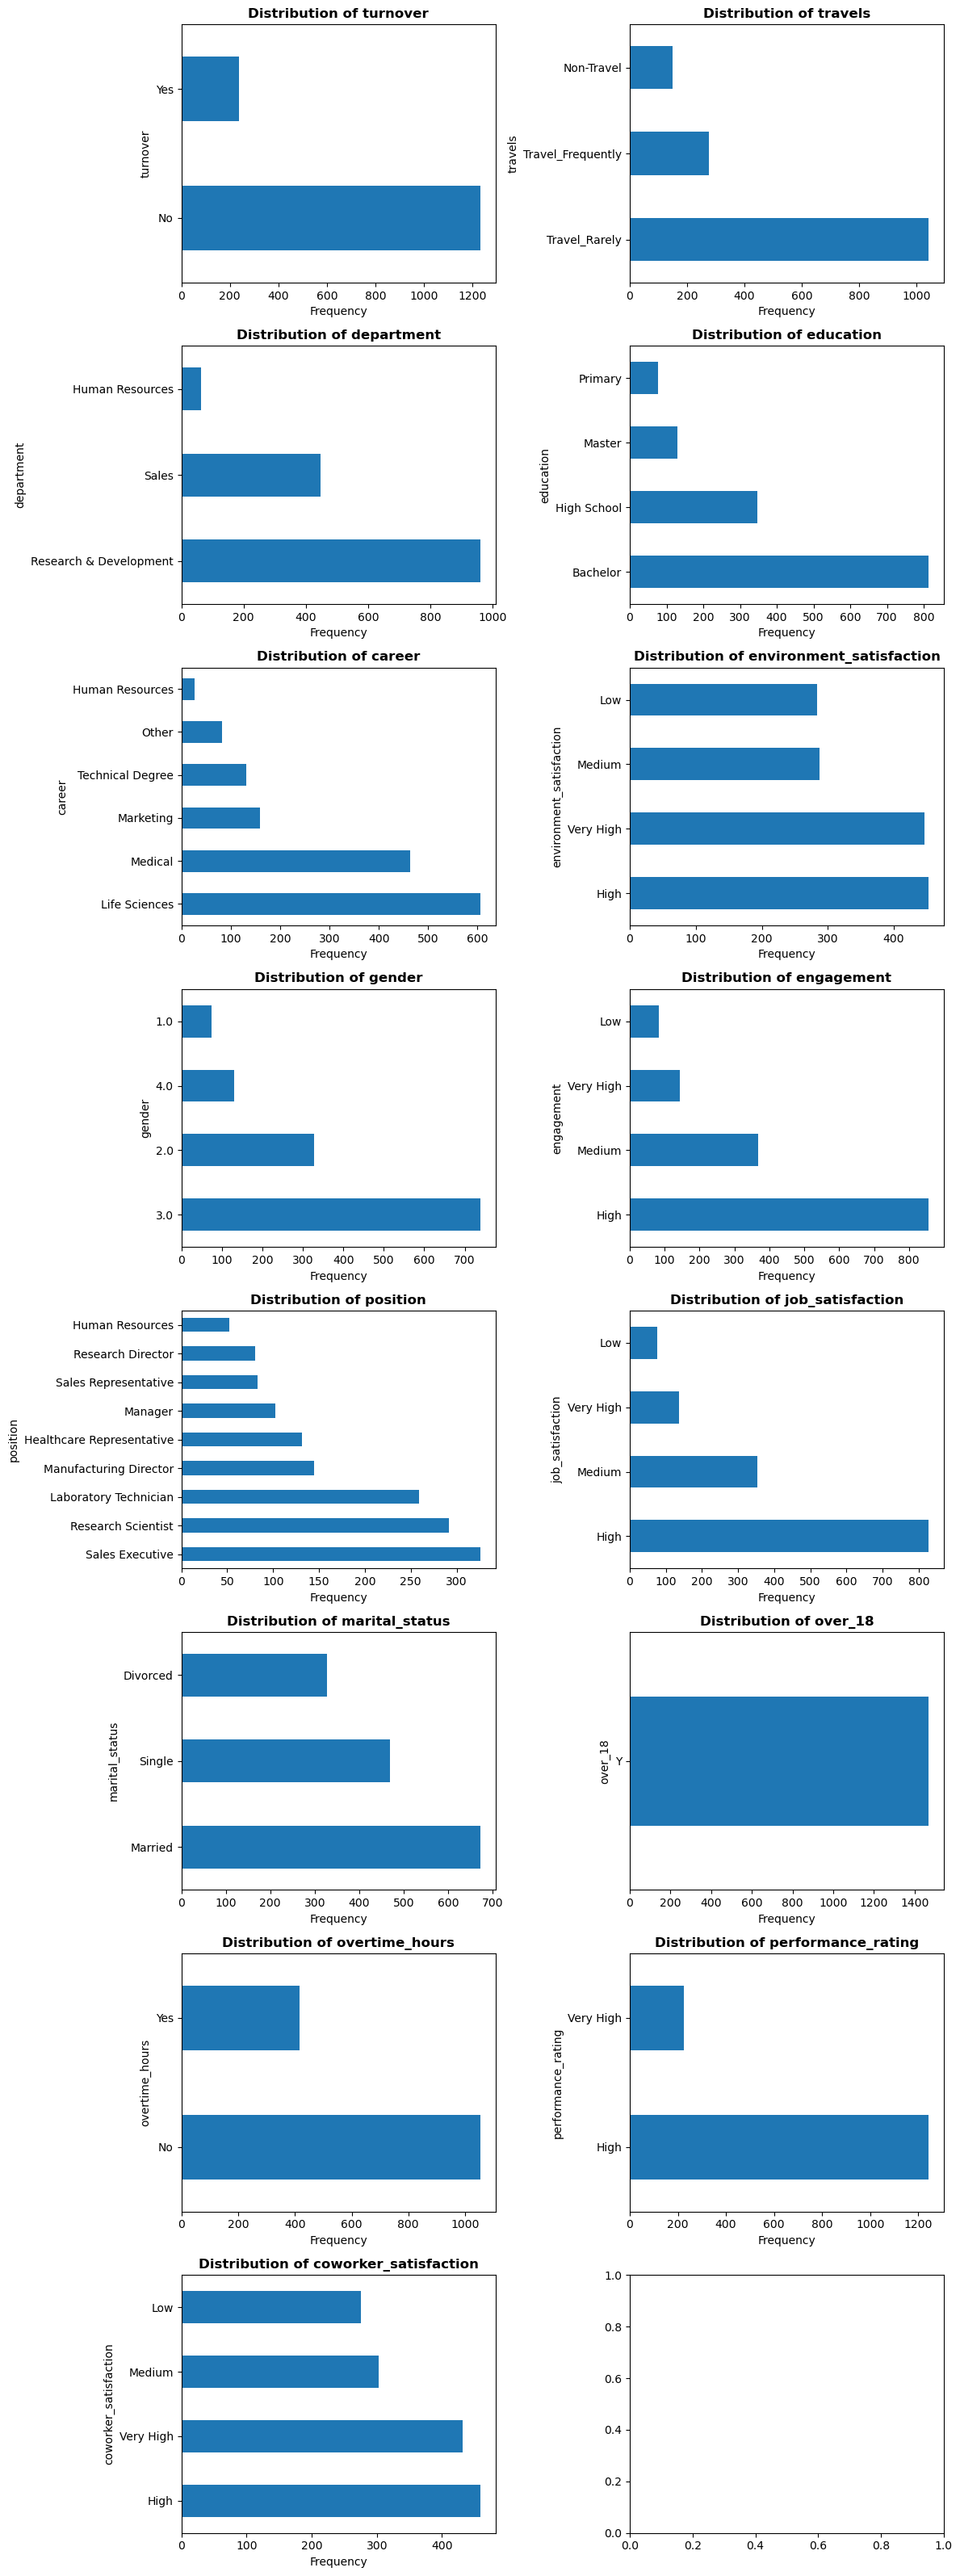

In [26]:
visualize_categorical(df.select_dtypes('O'))

Analysis:
- `over_18` has only one value -> drop column
- `gender` has 4 values and no description of each -> drop column
- The columns with nan values fill with the value most common:
  - `education`: fill with 'bachelor' as the 
  - `job_satisfaction`: fill with 'high'
  - `engagement`: fill with 'high'

In [27]:
df.drop(columns=['over_18', 'gender'], inplace=True)

# Fill missing values for categorical columns
df['education'] = df['education'].fillna('Bachelor')
df['job_satisfaction'] = df['job_satisfaction'].fillna('High')
df['engagement'] = df['engagement'].fillna('High')

### 7.2 Numerical features

In [28]:
statistics_numerical(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distance_from_home,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employees,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
job_level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
monthly_salary,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
previous_companies_count,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increase_pct,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
biweekly_hours,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
stock_option_level,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0
years_of_experience,1470.0,11.279592,10.0,7.780782,0.0,6.0,10.0,15.0,40.0


Analysis
- `employees` has only one value -> drop column
- `biweekly_hours` has only one value (80) -> drop column

In [29]:
df.drop(columns=['employees', 'biweekly_hours'], inplace=True)

Check data consistency:
- Check if `years_of_experience` is greater than `years_at_company`, `years_since_last_promotion`, `years_with_current_manager`
- `age` must be more than `years_at_company`

In [30]:
# Check data consistency
inconsistent_data = df.loc[(df['years_of_experience'] < df['years_at_company']) |
                    (df['years_of_experience'] > df['age']) |
                    (df['years_since_last_promotion'] > df['years_at_company']) |
                    (df['years_with_current_manager'] > df['years_at_company'])]
print(f'Inconsistent data rows: {inconsistent_data.shape[0]}')


Inconsistent data rows: 0


## 8. Insights and relations

### Problem quantification: What is the dropout rate?

First, we need to know how many employees leave the company, to create a baseline of the problem, how this impacts the business right now, and the benefits of reducing it.

In [31]:
round(df.turnover.value_counts(normalize = True) * 100, 2)

turnover
No     83.88
Yes    16.12
Name: proportion, dtype: float64

More than 16% of the employees have left the company in the last year.  
In case we could get dataset with historical data of multiple year, this could be interesting in a production environment to ask from the source, so we can correlate it with the time period and see metrics like `dropout_rate_by_year`.

### Relationships: There is an employee profile that left the company?

Study what is the impact of different variables in the turnover rate to see if there is a connection between some of them.

In [32]:
# Transform turnover to numerical
df['turnover'] = df.turnover.map({'No':0, 'Yes':1}).astype('int8')

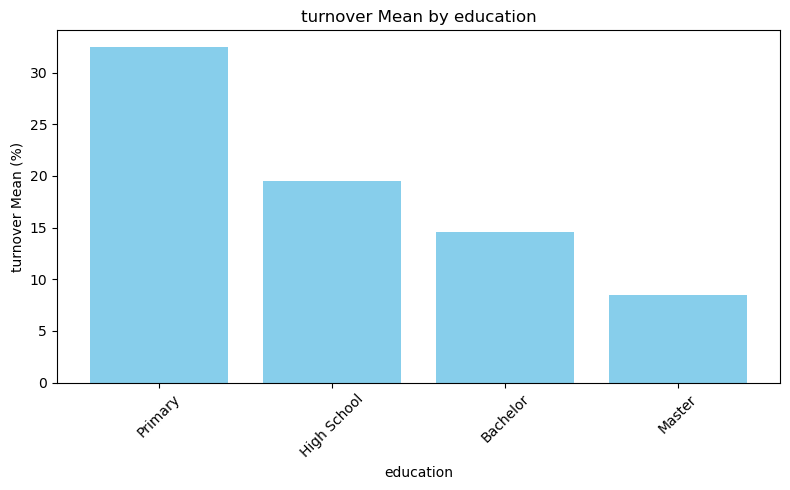

,education,turnover_mean,total
3,Primary,32.47,77
1,High School,19.54,348
0,Bachelor,14.54,915
2,Master,8.46,130


In [33]:
# Analysis by education
analysis_by_target(df, 'turnover', 'education')

More than 30% of the employees with a Primary education have left the company.  
That's 32.4% of 77 employees, 25.

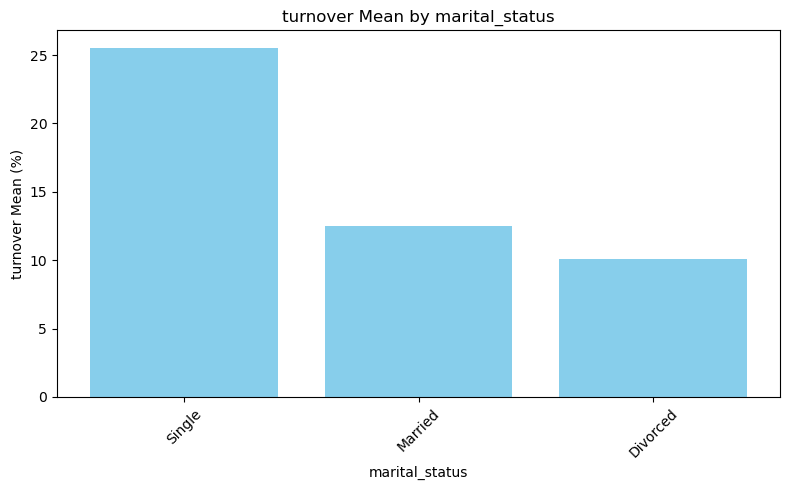

,marital_status,turnover_mean,total
2,Single,25.53,470
1,Married,12.48,673
0,Divorced,10.09,327


In [34]:
# Analysis by marital status
analysis_by_target(df, 'turnover', 'marital_status')

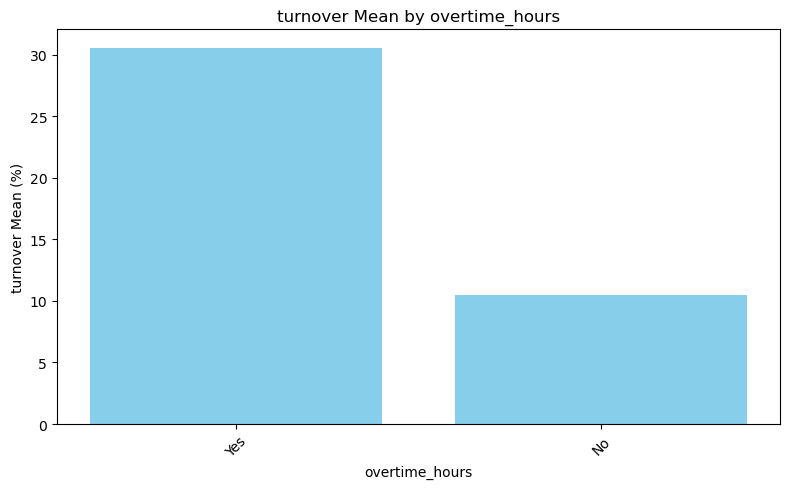

,overtime_hours,turnover_mean,total
1,Yes,30.53,416
0,No,10.44,1054


In [35]:
# Analysis by overtime hours
analysis_by_target(df, 'turnover', 'overtime_hours')

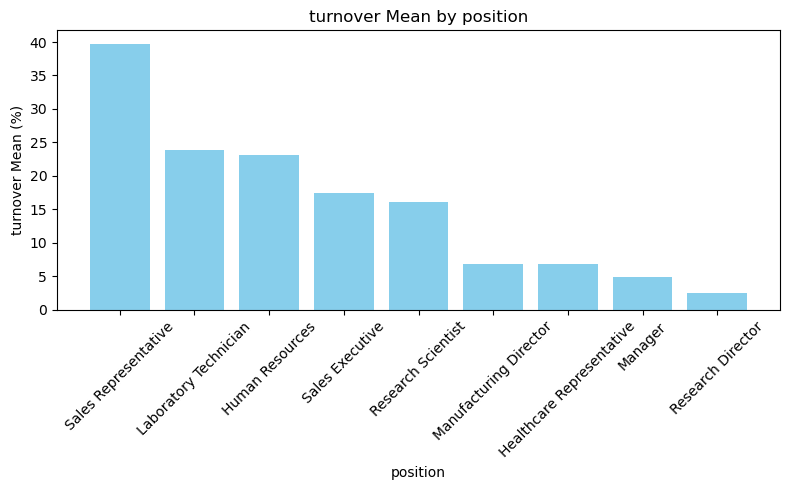

,position,turnover_mean,total
8,Sales Representative,39.76,83
2,Laboratory Technician,23.94,259
1,Human Resources,23.08,52
7,Sales Executive,17.48,326
6,Research Scientist,16.10,292
4,Manufacturing Director,6.90,145
0,Healthcare Representative,6.87,131
3,Manager,4.90,102
5,Research Director,2.50,80


In [36]:
# Analysis by position
analysis_by_target(df, 'turnover', 'position')

Analysis:  
We can see a pattern of employees who left the company. Primarly ones who is in one or more of these groups:
- Basic education level
- Single
- Does overtime hours
- Works in the Sales department, or is a Laboratory Technician or HR.

Let's check the salary impact.

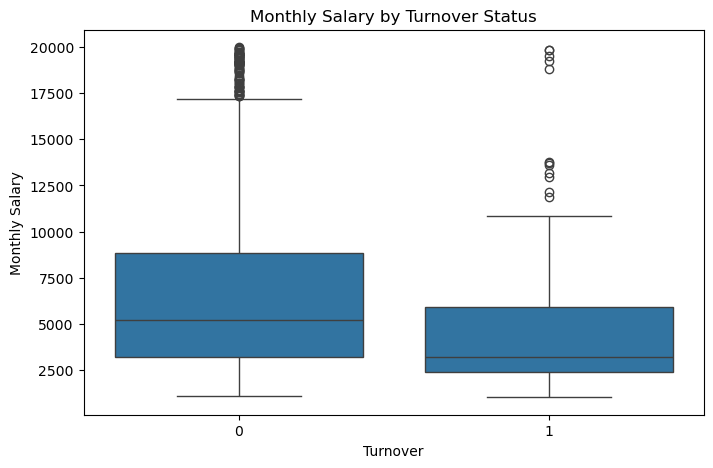

In [37]:
# Check the mean salary of employees that left
temp = df.groupby('turnover')['monthly_salary'].mean().round(2)

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='turnover', y='monthly_salary', data=df)
plt.title('Monthly Salary by Turnover Status')
plt.xlabel('Turnover')
plt.ylabel('Monthly Salary')
plt.show()

The roles with lower salary ranges have a more likelihood to left the company.  
This graph can be interpreted as:
- the 50% of people who left earned around $3000
- and 75% earned less than $5000
- while 50% of those who stayed earned around $5000

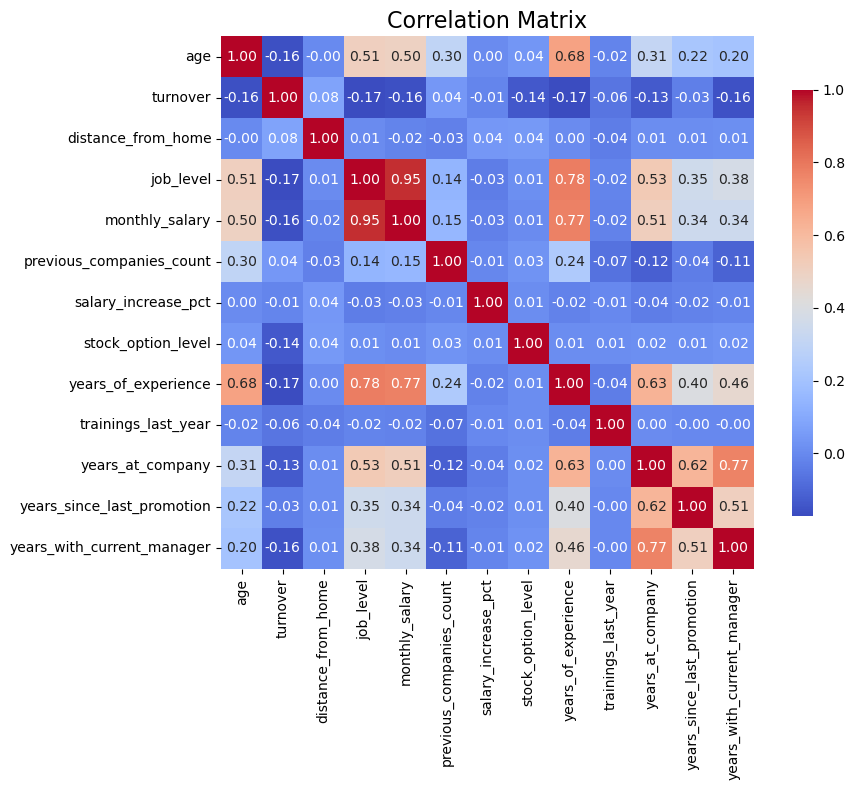

,age,turnover,distance_from_home,job_level,monthly_salary,previous_companies_count,salary_increase_pct,stock_option_level,years_of_experience,trainings_last_year,years_at_company,years_since_last_promotion,years_with_current_manager
age,1.000000,-0.159205,-0.001686,0.509604,0.497855,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.216513,0.202089
turnover,-0.159205,1.000000,0.077924,-0.169105,-0.159840,0.043494,-0.013478,-0.137145,-0.171063,-0.059478,-0.134392,-0.033019,-0.156199
distance_from_home,-0.001686,0.077924,1.000000,0.005303,-0.017014,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.010029,0.014406
job_level,0.509604,-0.169105,0.005303,1.000000,0.950300,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.353885,0.375281
monthly_salary,0.497855,-0.159840,-0.017014,0.950300,1.000000,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.344978,0.344079
previous_companies_count,0.299635,0.043494,-0.029251,0.142501,0.149515,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.036814,-0.110319
salary_increase_pct,0.003634,-0.013478,0.040235,-0.034730,-0.027269,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.022154,-0.011985
stock_option_level,0.037510,-0.137145,0.044872,0.013984,0.005408,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.014352,0.024698
years_of_experience,0.680381,-0.171063,0.004628,0.782208,0.772893,0.237639,-0.020608,0.010136,1.000000,-0.035662,0.628133,0.404858,0.459188
trainings_last_year,-0.019621,-0.059478,-0.036942,-0.018191,-0.021736,-0.066054,-0.005221,0.011274,-0.035662,1.000000,0.003569,-0.002067,-0.004096


In [38]:
correlation_matrix(df.select_dtypes('number'))

### Economic impact of turnover

The [Cost of Turnover](https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/) according of Center for American Progress is:
- Cost of turnover of employees that earns $30k or less -> 16.1% of their annual salary
- Employees that earns between $30k and $50k -> 19.7%
- Employees that earns between $50k and $75k -> 20.4%
- Employees that earns more than $75k -> 21%

In [39]:
df = feature_engineering_economic_costs(df)
df[['annual_salary', 'cost_of_turnover']].head()

,annual_salary,cost_of_turnover
id,,
1,71916,14670.864
2,61560,12558.240
4,25080,4037.880
5,34908,6876.876
7,41616,8198.352


#### How much has cost to the company the people who left?

In [40]:
# Economic cost of turnover
total_cost = df.loc[df.turnover == 1, 'cost_of_turnover'].sum()
print(f'Total Economic Cost of Turnover: ${total_cost:,.2f}')

Total Economic Cost of Turnover: $2,719,005.91


#### How much cost us last year that employees are not motivated? (engagement = Low)

In [41]:
low_engagement_cost = df.loc[(df.turnover == 1) & (df.engagement == 'Low'), 'cost_of_turnover'].sum()
print(f'Total Cost of Turnover for Low Engagement Employees: ${low_engagement_cost:,.2f}')

Total Cost of Turnover for Low Engagement Employees: $368,672.69


### Strategic actions revenue

What will be the impact and revenue (in cost reduction) of reducing the number of churned employees?

#### How much money can we save if reduce the number of employees that leave?

In [42]:
print(f"Reduction of 10% in turnover could save: ${total_cost * 0.10:,.2f} by year")
print(f"Reduction of 20% in turnover could save: ${total_cost * 0.20:,.2f} by year")
print(f"Reduction of 30% in turnover could save: ${total_cost * 0.30:,.2f} by year")

Reduction of 10% in turnover could save: $271,900.59 by year
Reduction of 20% in turnover could save: $543,801.18 by year
Reduction of 30% in turnover could save: $815,701.77 by year


#### Action plan by profile

As we had seen that some profiles are more likely to leave the company (single, salesman, etc), ee could define measures to prevent abandonment and study the profiles to know if it is profitable to apply a retention strategy in these segments.

For example, we want to know the ROI of apply strategies on the Sales Representatives.

First we want to know the % of sales representatives that left the company last year, in order to calculate a naive prediction on how many will be leave this year.

In [43]:
total_sales_reps = len(df.loc[df.position == 'Sales Representative'])
churned_sales_reps = len(df.loc[(df.position == 'Sales Representative') & (df.turnover == 1)])
churn_rate = churned_sales_reps/total_sales_reps * 100

print(f"Total Sales Representatives: {total_sales_reps}")
print(f"Churned Sales Representatives: {churned_sales_reps}")
print(f"Churn Rate: {churn_rate:.2f}%")

Total Sales Representatives: 83
Churned Sales Representatives: 33
Churn Rate: 39.76%


How many will be leave this year with a naive prediction (same as the last year)

In [44]:
total_sales_reps_actual = len(df.loc[(df.position == 'Sales Representative') & (df.turnover == 0)])
churn_pred_sales_reps = int(total_sales_reps_actual * (churn_rate / 100))
print(f"Naive Prediction of Sales Representatives that will leave this year: {churn_pred_sales_reps}")

Naive Prediction of Sales Representatives that will leave this year: 19


If we can retain 20% of them, how much money can we save to the company?

In [45]:
retention_rate = 0.20
retention_sales_reps = int(churn_pred_sales_reps * retention_rate)
potential_savings = df.loc[(df.position == 'Sales Representative') & (df.turnover == 0), 'cost_of_turnover'].sum() * churn_rate/100 * retention_rate
print(f"Potential Savings by retaining 20% of predicted churned Sales Representatives: ${potential_savings:,.2f} and {retention_sales_reps} employees retained")

Potential Savings by retaining 20% of predicted churned Sales Representatives: $24,964.82 and 3 employees retained


Also, this info gives us a good measure to create a budget for this year in innitives that promotes the retention of talent.

## 9. Data Quality notes

Missing Data:
- Remove columns `years_in_position`, `work_life_balance` (too many nan)
- Remove column `over_18`,  `employees` and `biweekly_hours` (only one value constant)
- Remove column `gender` because has 4 possible values but no metadata to determine if this is a wrong input or non-binary genders
- Fill with the most common value columns `education`, `job_satisfaction` and `engagement`

Outliers:
- `monthly_salary` maximun value is $19.999 and the median is less than $5.000: it can be a leader position or maybe a error in the data -> remove line in data cleaning to avoid introduce possible errors

Checked data consistency:
- All rows where `years_of_experience` is greater than `years_at_company`, `years_since_last_promotion`, `years_with_current_manager`
- All rows with `age` greater than `years_at_company`

## 10. Next steps
- Prepare for modeling (data cleaning, encoding)

## 📌 Summary
- Data loaded successfully; key features explored.
- Identified missing values and basic distributions.
- Clear early churned profile: position, engagement, marital status, overtime.
- Several data quality issues flagged.
- Extracted some insights and define ecnomic impact and ROI of applying retention strategies.

## Save processed data

In [46]:
df.to_csv(project_root / 'data' / 'processed' / 'employee_churn_cleaned.csv', index=False)